## HOUSE PRICE PREDICTION 


### importing all the libraries that are needed

In [1]:
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file

In [2]:
df=pd.read_csv('listings_summary.csv')

In [3]:
print(f"No_of_rows={df.shape[0]}")
print(f'No_of_Columns={df.shape[1]}')

No_of_rows=22552
No_of_Columns=76


### In the CSV file:  No of rows=22552 ,No of columns=76

In [4]:
df.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,...,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,...,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,...,9.0,t,NaN,f,f,moderate,f,f,1,1.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

### Dataset having columns of datatypes: int, float, object.

In [6]:
df.describe()

,id,scrape_id,last_scraped,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,22552.000000,2.255200e+04,9657.000000,0.0,22526.000000,22526.000000,22552.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018110e+13,43411.000266,5.403355e+07,0.918985,NaN,2.330685,2.330685,52.509824,13.406107,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,0.000000e+00,0.023066,5.816290e+07,0.193761,NaN,19.947823,19.947823,0.030825,0.057964,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018110e+13,43411.000000,2.217000e+03,0.000000,NaN,0.000000,0.000000,52.345803,13.103557,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018110e+13,43411.000000,9.240002e+06,0.950000,NaN,1.000000,1.000000,52.489065,13.375411,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018110e+13,43411.000000,3.126711e+07,1.000000,NaN,1.000000,1.000000,52.509079,13.416779,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018110e+13,43411.000000,8.067518e+07,1.000000,NaN,2.000000,2.000000,52.532669,13.439259,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018110e+13,43413.000000,2.245081e+08,1.000000,NaN,1676.000000,1676.000000,52.651670,13.757642,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


### The above one having the count, mean, std, min, 25%, 50%, 75%, max of all columns. 

<AxesSubplot:>

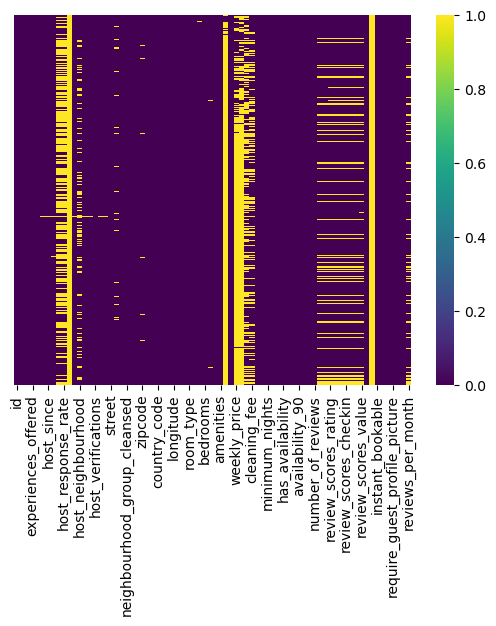

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

### The graph show the null values.

### Now we need to remove Null Values(or missing values).

In [8]:
df.isnull().sum()

id                                     0
scrape_id                              0
last_scraped                           0
experiences_offered                    0
host_id                                0
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   3914
Length: 76, dtype: int64

### The above one gives the number of null values present in each column.

### Now Deleting(Droping) the columns which having morethan 30% of null values.

In [9]:
null = (df.isnull().sum()/len(df)) * 100
all_cols=df.columns.tolist()
missing_percent_data=pd.DataFrame([all_cols,null])
missing_percent_data.T

,0,1
0,id,0.0
1,scrape_id,0.0
2,last_scraped,0.0
3,experiences_offered,0.0
4,host_id,0.0
...,...,...
71,cancellation_policy,0.0
72,require_guest_profile_picture,0.0
73,require_guest_phone_verification,0.0
74,calculated_host_listings_count,0.0


In [10]:
# Get the column names where the null percentage exceeds the threshold
columns_to_remove = null[null> 30].index.tolist()
df= df.drop(columns=columns_to_remove)
print(f"{df.shape[1]} left after deleting few columns ")

67 left after deleting few columns 


### Replaceing the values

In [11]:
df['host_is_superhost'].replace('t',1, inplace=True)
df['host_is_superhost'].replace('f',0, inplace=True)
df['instant_bookable'].replace('t',1, inplace=True)
df['instant_bookable'].replace('f',0, inplace=True)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype('float64')

<AxesSubplot:>

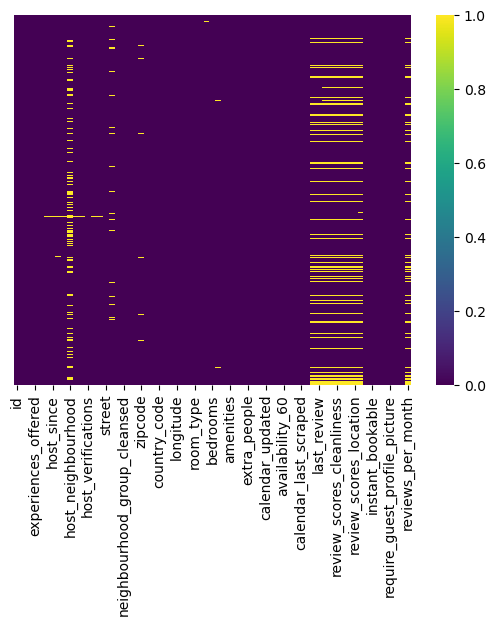

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  float64
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

### Filling nullvalues with 0

In [14]:
df['bathrooms'].fillna(0, inplace=True)
df['bedrooms'].fillna(0, inplace=True)
df['beds'].fillna(0, inplace=True)
df['host_is_superhost'].fillna(0, inplace=True)
df['host_neighbourhood'].fillna(0, inplace=True)
df['street'].fillna(0, inplace=True)
df['zipcode'].fillna(0, inplace=True)
df['last_review'].fillna(0, inplace=True)
df['review_scores_location'].fillna(0, inplace=True)
df['review_scores_cleanliness'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['instant_bookable'].fillna(0, inplace=True)

### Updated dataset.

In [15]:
df = df.loc[:,['host_is_superhost','property_type', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    'amenities', 'price', 'minimum_nights',
    'maximum_nights', 'instant_bookable',
    'cancellation_policy', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [16]:
df.isnull().sum()

host_is_superhost                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
instant_bookable                  0
cancellation_policy               0
review_scores_rating           4389
review_scores_accuracy         4414
review_scores_cleanliness         0
review_scores_checkin          4432
review_scores_communication    4418
review_scores_location            0
review_scores_value            4435
dtype: int64

In [17]:
df['review_scores_rating'].fillna(0, inplace=True)
df['review_scores_accuracy'].fillna(0, inplace=True)
df['review_scores_checkin'].fillna(0, inplace=True)
df['review_scores_communication'].fillna(0, inplace=True)
df['review_scores_value'].fillna(0, inplace=True)

### So, Finally there are no null values in dataset

In [18]:
df.isnull().sum()

host_is_superhost              0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
instant_bookable               0
cancellation_policy            0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            22552 non-null  float64
 1   property_type                22552 non-null  object 
 2   room_type                    22552 non-null  object 
 3   accommodates                 22552 non-null  int64  
 4   bathrooms                    22552 non-null  float64
 5   bedrooms                     22552 non-null  float64
 6   beds                         22552 non-null  float64
 7   bed_type                     22552 non-null  object 
 8   amenities                    22552 non-null  object 
 9   price                        22552 non-null  float64
 10  minimum_nights               22552 non-null  int64  
 11  maximum_nights               22552 non-null  int64  
 12  instant_bookable             22552 non-null  int64  
 13  cancellation_pol

<AxesSubplot:>

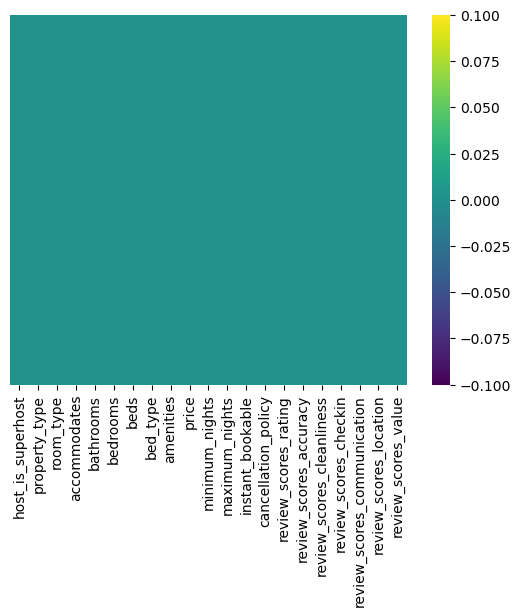

In [20]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

### The graph says that there are no null values in dataset.

### As all null values are gone. So now finding the corretation of eachcolumns

<AxesSubplot:>

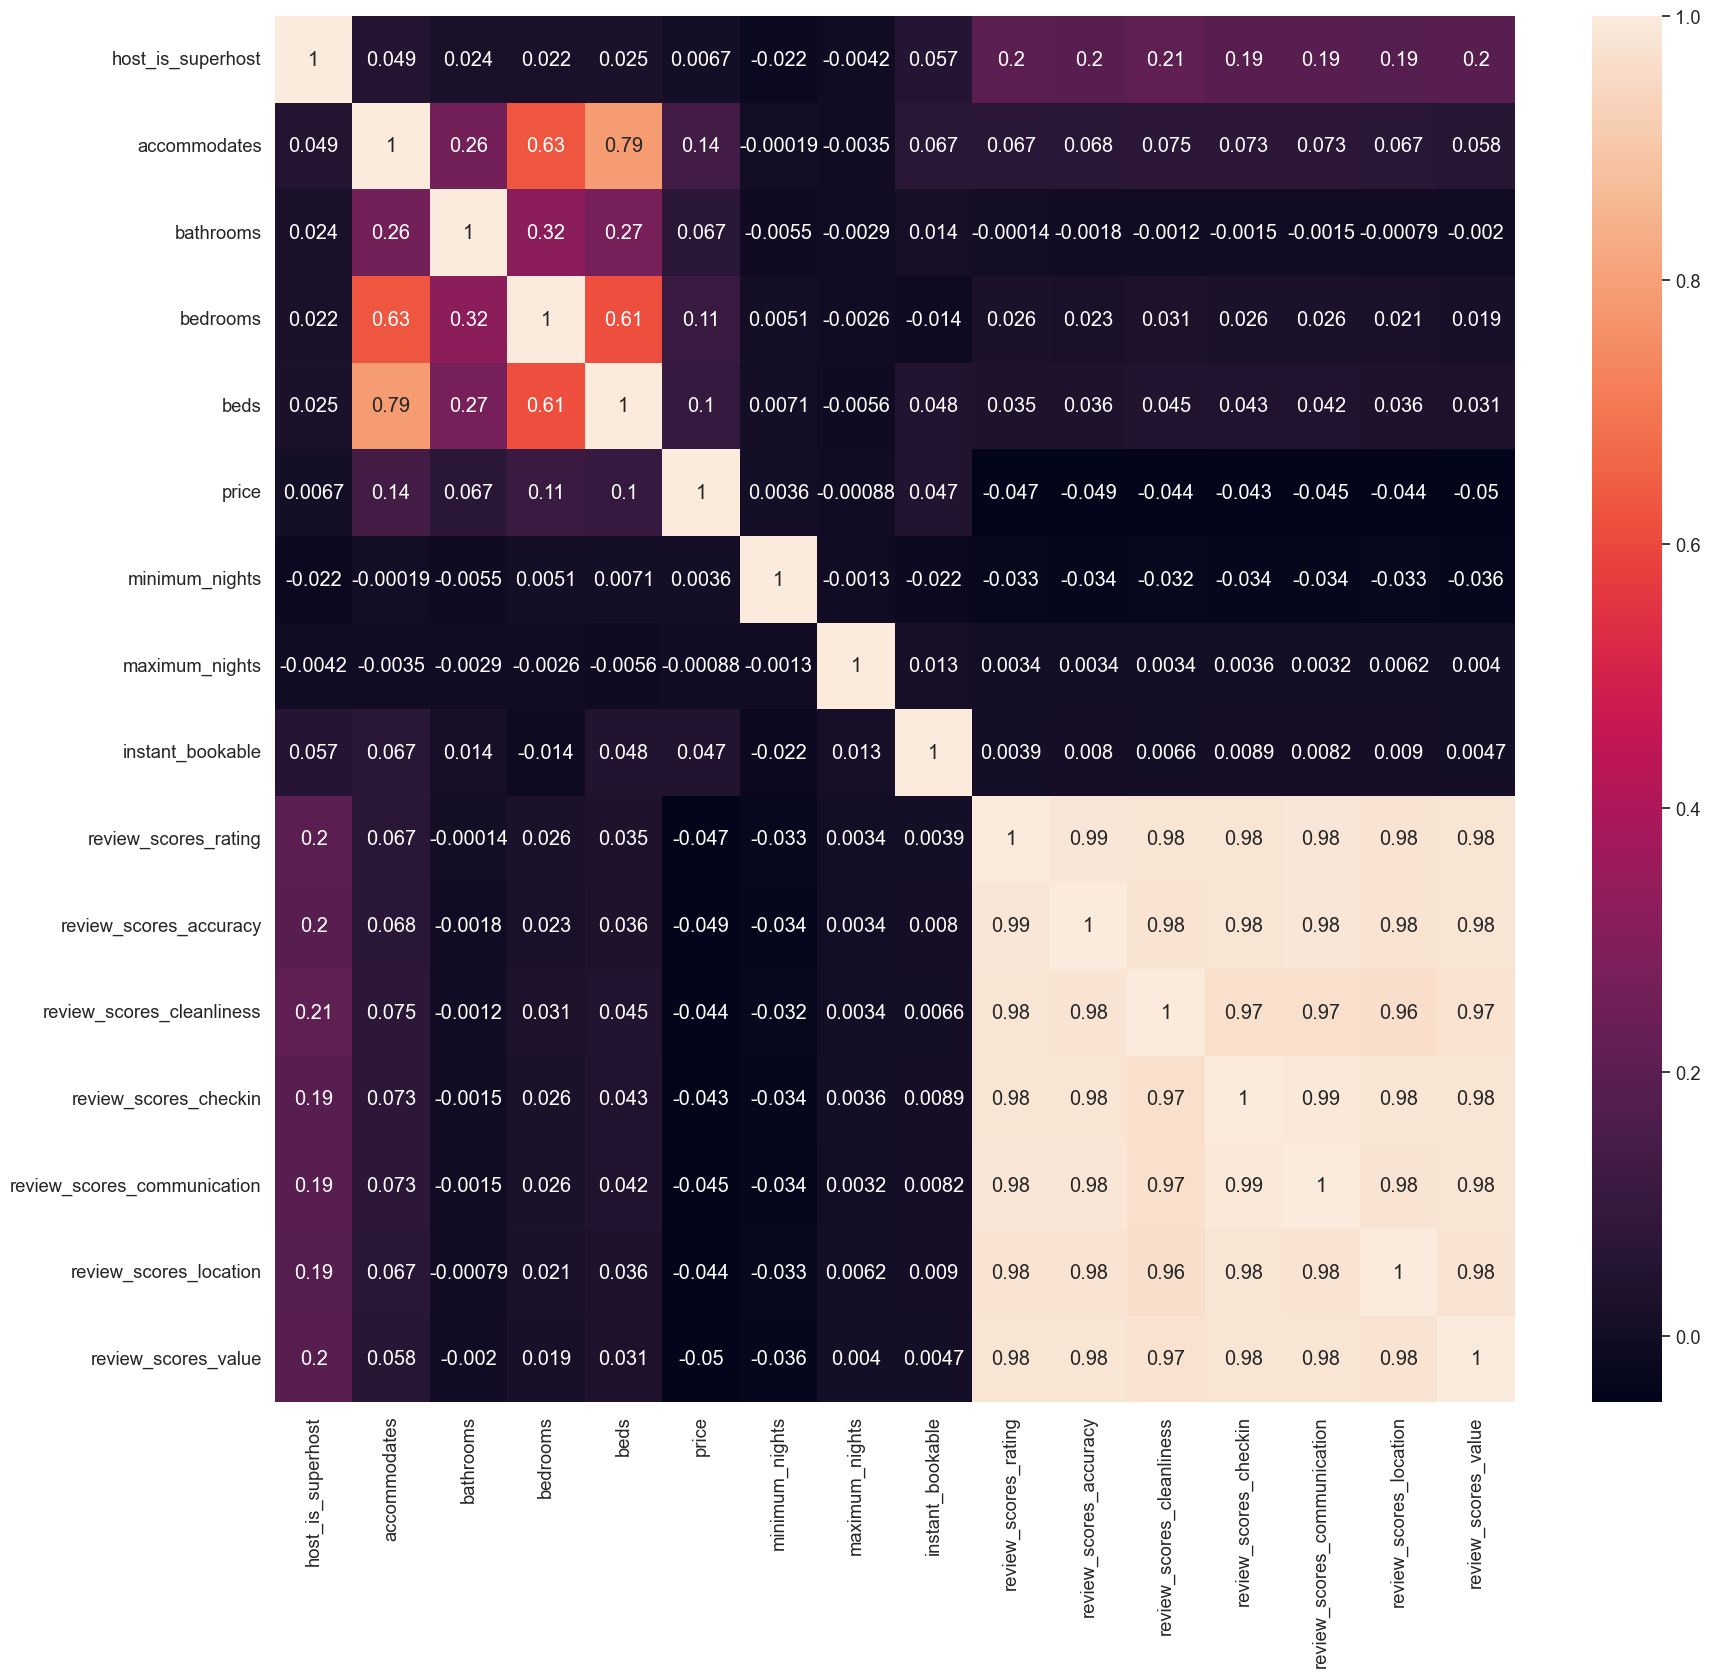

In [21]:
plt.figure(figsize=(20,18))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

In [22]:
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

df['property_type'] = df['property_type'].apply(recode)

In [23]:
df['property_type'].value_counts()

Apartment      20225
Other           1317
Condominium      612
House            398
Name: property_type, dtype: int64

In [24]:
df.drop(['room_type','property_type','bed_type'],axis=1,inplace=True)

In [25]:
df.loc[0:1,'amenities']

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
Name: amenities, dtype: object

In [26]:
df.loc[:,'amenities_length'] = df['amenities'].str.len()

In [27]:
df= df.drop('amenities',axis=1)

In [28]:
df.loc[0:1,'amenities_length']

0    407
1    120
Name: amenities_length, dtype: int64

In [29]:
cancellation_policy= ['flexible', 'moderate', 'strict_14_with_grace_period', 'super_strict_30', 'super_strict_60']
label_encoder = LabelEncoder()
df['cancellation_policy_encoded'] = label_encoder.fit_transform(df['cancellation_policy'])
df.drop('cancellation_policy',axis=1,inplace=True)
df['cancellation_policy_encoded'].value_counts()

0    9102
1    7096
2    6287
3      53
4      14
Name: cancellation_policy_encoded, dtype: int64

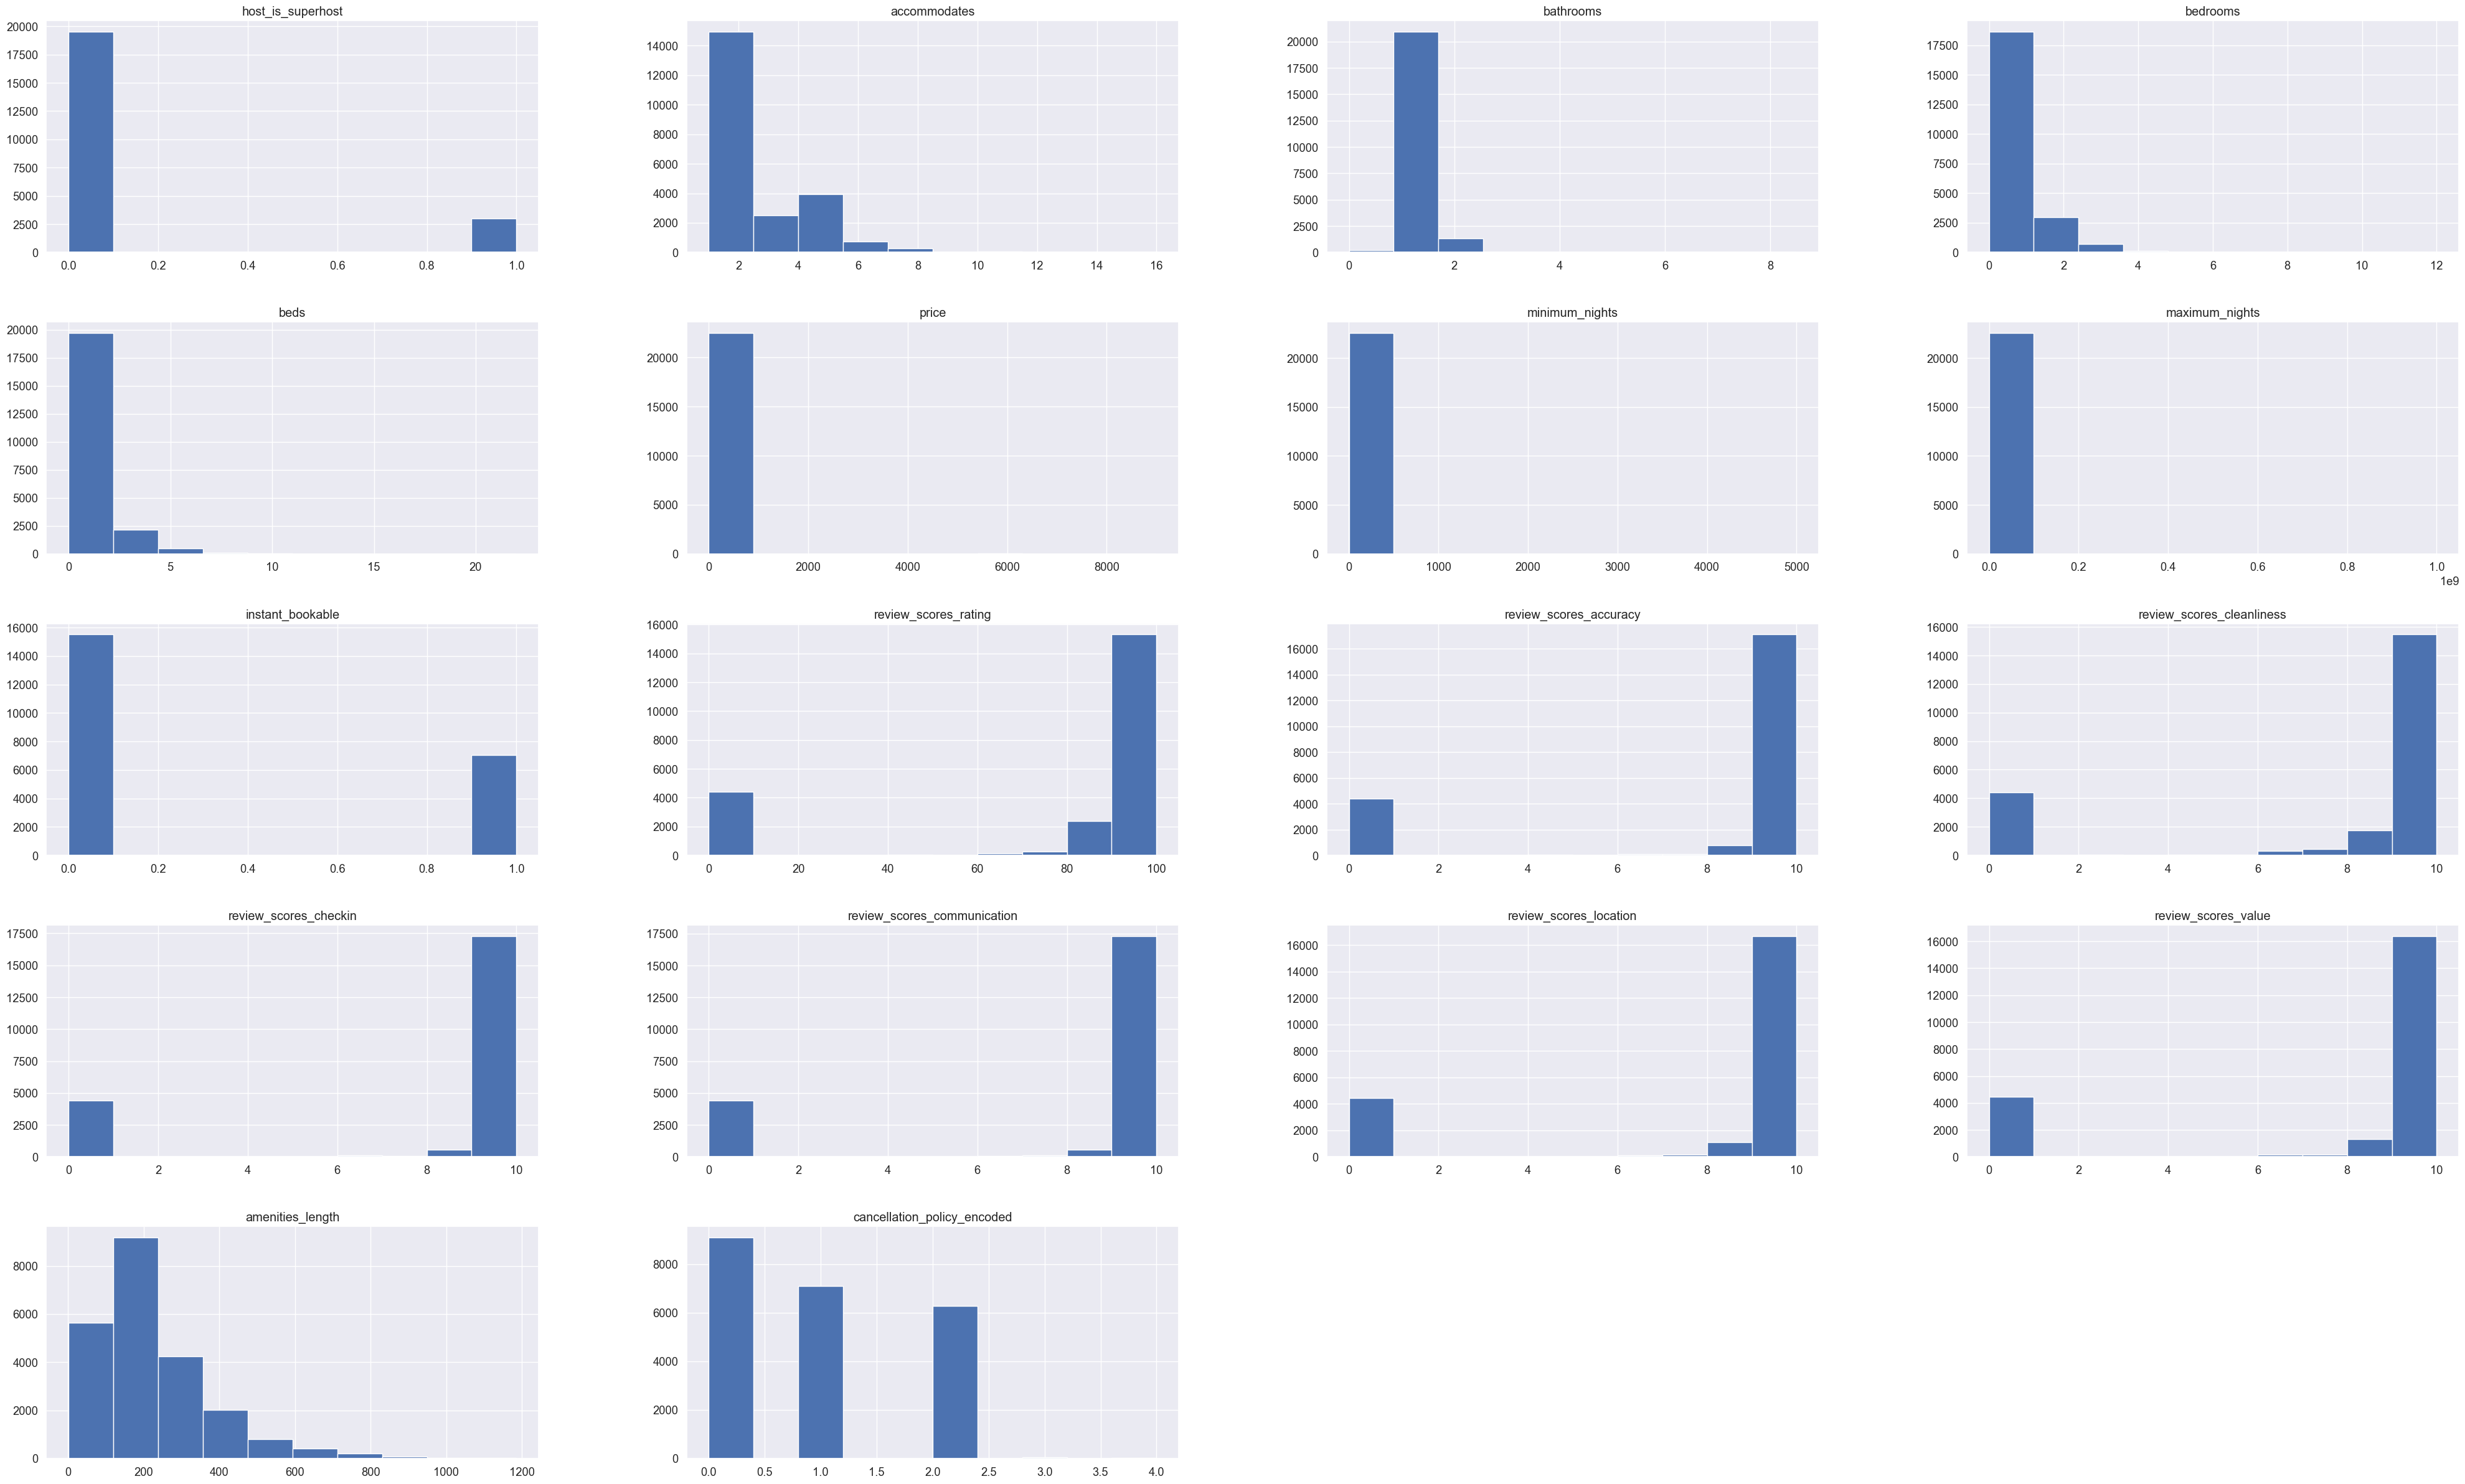

In [30]:
fig = plt.figure(figsize = (50,30))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Model Training

#### Give The dataset to x and y.

In [31]:
x=df.drop('price',axis=1)
y=df['price']

In [32]:
scaler=MinMaxScaler()
y_scale=scaler.fit_transform(y.values.reshape(-1,1))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y_scale,test_size=0.2,random_state=0)

In [34]:
print('training_set_samples:',x_train.shape[0])
print('testing_set:_samples',x_test.shape[0])

training_set_samples: 18041
testing_set:_samples 4511


### Linear Regression Model

In [35]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_test_pred=lr_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

0.001070526351573097


### Decision Tree

In [37]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
y_test_pred=dt_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

0.0010286392912995184
0.05169019611644721


### Random Forest

In [39]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_test_pred=rf_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

0.0008387039856181422
0.22679289149737059


### KNN

In [41]:
kn_model=KNeighborsRegressor(n_neighbors=5)
kn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [42]:
y_test_pred=kn_model.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

0.0008943746642911296
0.1754697009280608


### Comparing all models

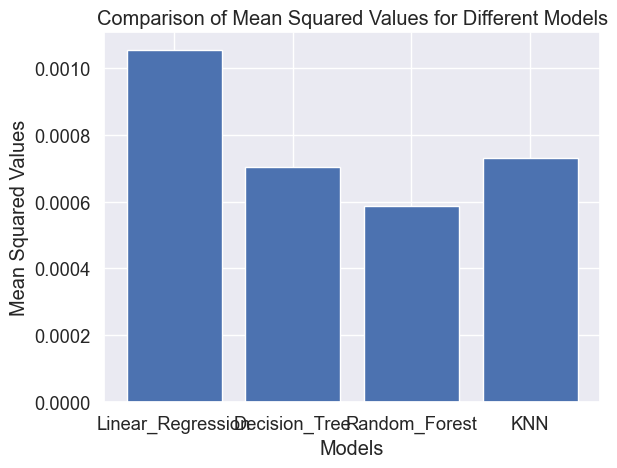

In [43]:
mean_squared_values = [0.001054247860193661,0.0007045759797191381,0.0005882791457864324, 0.0007317107927672001]
model_names = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'KNN']
plt.bar(model_names, mean_squared_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.title('Comparison of Mean Squared Values for Different Models')
plt.show()